# Un estudio del precio de la vivienda en Bogotá

## Introducción

No es un secreto que adquirir vivienda propia es algo cada vez más difícil en todo el mundo. Colombia y especialmente Bogotá no es la excepción, por eso esto proyecto busca resolver una pregunta que muchas personas se pueden estar haciendo en este momento: ¿En qué parte de la ciudad es más asequible la vivienda? Para dar una solución a esta hemos tomado datos de los inmuebles en venta en la página web www.fincaraiz.com.co el día 14 de octubre de 2023. Con esto ya podremos empezar a abordar nuestro problema.

## Extracción y limpieza de datos

Primero debemos aclarar que los datos aquí utilizados han sido extraídos mediante la creación de un web scraper, su código se encuentra en este mismo repositorio (web_scraper_fr.py).

Haremos uso de las librerías Numpy, Pandas y Matplotlib, además de algunos módulos de Scikitlearn, por lo que empezaremos importando estos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Un breve vistazo al archivo house_data.csv basta para observar que hay filas en las que el tipo de vivienda puede aparecer como 'Project' o el número de habitaciones puede estar como 'Sin especificar'. También existen propiedades cuyo precio sobre pasa los 10 mil millones de pesos, algo que puede afectar la vista general de todos nuestros datos. Realmente no queremos que estas entradas afecten al resto de nuestros datos por lo que las eliminaremos. Adicionalmente nos aseguraremos de que cada columna tenga el tipo de dato adecuado.

In [2]:
df = pd.read_csv('vivienda_data.csv', encoding='latin-1')
df = df[(df['property_type'] != 'project')]
df = df[df['rooms'] != 'Sin especificar']
df = df[df['price'] < 10000000000]
df = df.convert_dtypes()
df = df.astype({'rooms': 'Int64'})

Con esto ya podemos dar un vistazo a nuestros datos.

In [3]:
df.head()

,property_type,rooms,garages,age,area,floor,administration_price,stratum,lat,lng,neighbourhood,locality,price
0,house,10,0,FROM_16_TO_30_YEARS,228.0,3,1111,1,4.585353,-74.171677,Ismael Perdomo,Ciudad bolivar,310000000
1,apartment,3,0,FROM_1_TO_8_YEARS,68.0,6,50000,1,4.623208,-74.189319,Escocia,Bosa,150000000
2,apartment,3,0,FROM_16_TO_30_YEARS,98.0,2,50,1,4.617961,-74.073414,Armenia,Teusaquillo,417000000
3,house,6,1,MORE_THAN_30_YEARS,150.0,0,0,1,4.562829,-74.113066,Providencia alta,Rafael uribe,370000000
4,apartment,3,0,LESS_THAN_1_YEAR,51.98,12,155000,1,4.568478,-74.089804,Montebello,San cristobal,229000000


## Visualización de los datos

La mejor forma de dar hacernos una idea de lo que estos datos nos pueden contar es visualizándolos. Para esto haremos uso de la función 'groupby' en algunas de las columnas de nuestro DataFrame y calcularemos el precio promedio de cada uno de estos grupos.

Empezaremos analizando la relación entre el precio promedio entre el tipo de propiedad y el precio de esta.

C:\Users\ediso\AppData\Local\Temp\ipykernel_4080\2114224758.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Casa', 'Apartamento'])
C:\Users\ediso\AppData\Local\Temp\ipykernel_4080\2114224758.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,1200,200))


<function matplotlib.pyplot.show(close=None, block=None)>

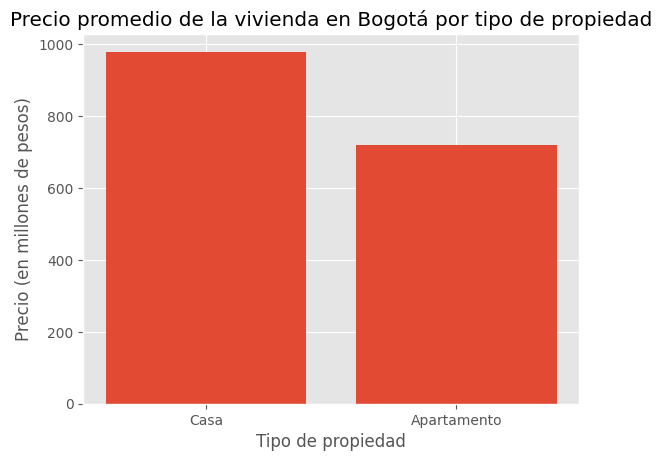

In [4]:
plt.style.use("ggplot")
fig, ax = plt.subplots()
mean_price_property_type = df.groupby('property_type', as_index=False)['price'].mean().sort_values(by = 'price', ascending = False)
ax.bar(mean_price_property_type['property_type'], mean_price_property_type['price'])
ax.set_xticklabels(['Casa', 'Apartamento'])
ax.set_yticklabels(range(0,1200,200))
ax.set_title('Precio promedio de la vivienda en Bogotá por tipo de propiedad')
ax.set_xlabel('Tipo de propiedad')
ax.set_ylabel('Precio (en millones de pesos)')
plt.show

Se observa que las casas en promedio son un 36% más caras que los apartamentos, lo cual no es una sorpresa pues están suelen ser de un tamaño mucho mayor.

Proseguimos a estudiar la segmentación de las propiedades con respecto a su antigüedad.

C:\Users\ediso\AppData\Local\Temp\ipykernel_4080\3646190548.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Más de 30 años', 'Entre 16 y 30 años', 'Entre 9 y 15 años', 'Entre 1 y 8 años', 'Indefinido', 'Menos de un año'], rotation = 90)
C:\Users\ediso\AppData\Local\Temp\ipykernel_4080\3646190548.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,1200,200))


,age,price
4,MORE_THAN_30_YEARS,924871864.628183
0,FROM_16_TO_30_YEARS,787611312.860303
2,FROM_9_TO_15_YEARS,720465114.075981
1,FROM_1_TO_8_YEARS,719091546.576683
5,UNDEFINED,630849625.969697
3,LESS_THAN_1_YEAR,600288080.805797


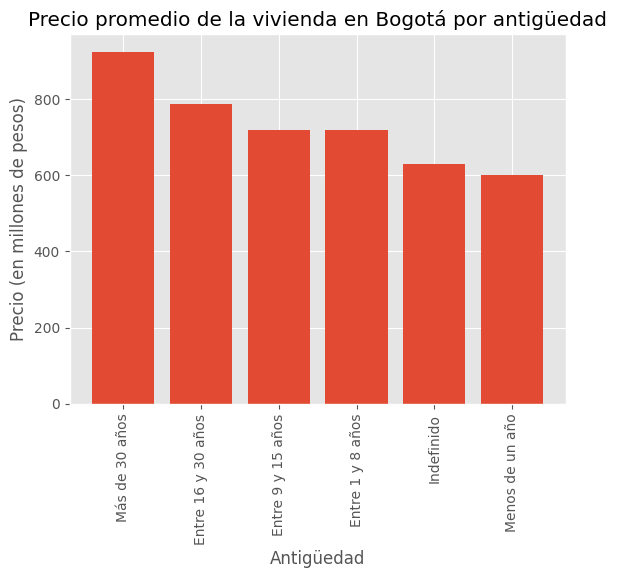

In [5]:
fig, ax = plt.subplots()
mean_price_age = df.groupby('age', as_index=False)['price'].mean().sort_values(by = 'price', ascending = False)
ax.bar(mean_price_age['age'], mean_price_age['price'])
ax.set_xticklabels(['Más de 30 años', 'Entre 16 y 30 años', 'Entre 9 y 15 años', 'Entre 1 y 8 años', 'Indefinido', 'Menos de un año'], rotation = 90)
ax.set_yticklabels(range(0,1200,200))
ax.set_title('Precio promedio de la vivienda en Bogotá por antigüedad')
ax.set_xlabel('Antigüedad')
ax.set_ylabel('Precio (en millones de pesos)')
mean_price_age

Aquí pasa algo interesante, las casas más antiguas son más costosas, aunque no con mucha diferencia. Esto puede ser algo realmente sorprendente y su explicación va más allá del objetivo de este proyecto.

A continuación realizaremos este mismo estudio con repecto al estrato de cada propiedad.

C:\Users\ediso\AppData\Local\Temp\ipykernel_4080\1694734938.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,1600,200))


<function matplotlib.pyplot.show(close=None, block=None)>

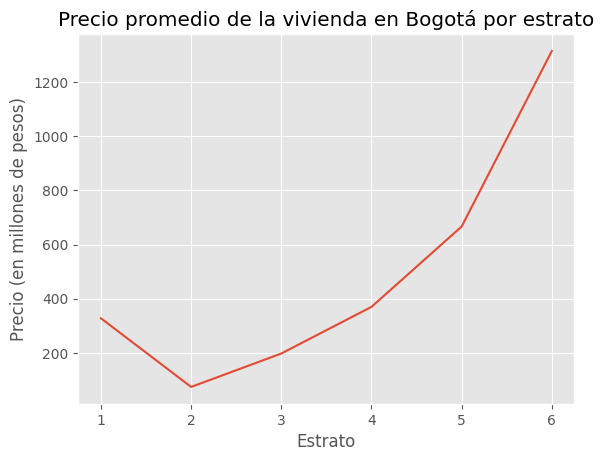

In [6]:
fig, ax = plt.subplots()
mean_price_stratum = df.groupby('stratum', as_index=False)['price'].mean().sort_values(by = 'stratum')
ax.plot(mean_price_stratum['stratum'], mean_price_stratum['price'])
ax.set_yticklabels(range(0,1600,200))
ax.set_title('Precio promedio de la vivienda en Bogotá por estrato')
ax.set_xlabel('Estrato')
ax.set_ylabel('Precio (en millones de pesos)')
plt.show

Aquí no hay mayores sorpresas, salvo por el precio promedio del estrato 1 siendo mayor que los del 2 y 3. Esto es seguramente debido a que las propiedades de estrato 1 suelen ser casas mientras que las de 2 y 3 son en su mayoría apartamentos.

Seguimos con las localidades, una de las separaciones que mayor información nos puede ofrecer.

C:\Users\ediso\AppData\Local\Temp\ipykernel_4080\2762351136.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mean_price_locality['locality'], rotation = 90)
C:\Users\ediso\AppData\Local\Temp\ipykernel_4080\2762351136.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,1600,200))


<function matplotlib.pyplot.show(close=None, block=None)>

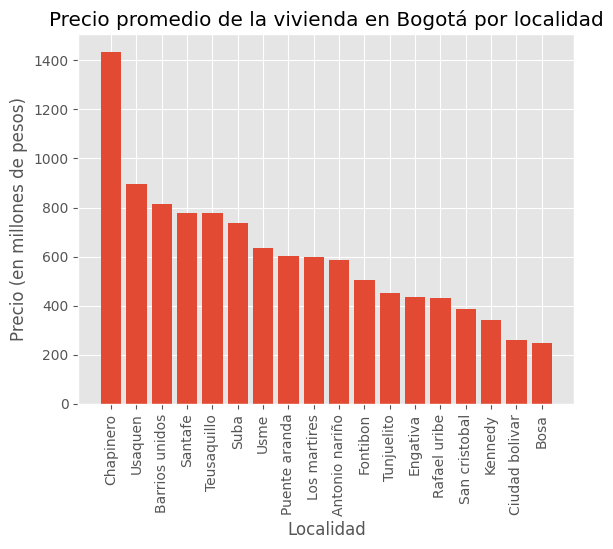

In [7]:
fig, ax = plt.subplots()
mean_price_locality = df.groupby('locality', as_index=False)['price'].mean().sort_values(by = 'price', ascending = False)
ax.bar(mean_price_locality['locality'], mean_price_locality['price'])
ax.set_xticklabels(mean_price_locality['locality'], rotation = 90)
ax.set_yticklabels(range(0,1600,200))
ax.set_title('Precio promedio de la vivienda en Bogotá por localidad')
ax.set_xlabel('Localidad')
ax.set_ylabel('Precio (en millones de pesos)')
plt.show

Aquí la tendencia es clara, el centro y el norte tienen los precios más altos de la ciudad con una buena diferencia. Esto deja a las localidades ubicadas al sur como las que tienen viviendas más asequibles. Lo más destacable aquí es la gran difernecia entre la primera y la segunda localidad con los precios más altos, que es de un 60 %.

Podemos ir un poco más allá con respecto a las localidades para encontrar los barrios más costosos y más económicos de cada una de estas. Para ello crearemos la siguiente función.

In [8]:
def top_barrios_por_localidad(locality, n):
    df_locality = df[df['locality'] == locality]
    mean_price_neighbourhood = df_locality.groupby('neighbourhood', as_index=False)['price'].mean().sort_values(by = 'price', ascending = False)
    n_mas_costosos = mean_price_neighbourhood.head(n)
    n_mas_economicos = mean_price_neighbourhood.tail(n)
    print(f"{n} barrios más costosos:")
    for i in range(n):
        print(list(n_mas_costosos['neighbourhood'])[i])    
    print(f"{n} barrios más económicos:")
    for i in range(n):
        print(list(n_mas_economicos['neighbourhood'])[i])

Con la anterior función podremos encontrar los n barrios más caros y más baratos de cada localidad. Al probarla para encontrar los datos de Chapinero obtenemos lo siguiente.

In [9]:
top_barrios_por_localidad('Chapinero', 3)

3 barrios más costosos:
Vía la Calera
Quinta Camacho chapinero
Nogal
3 barrios más económicos:
Ub. los ocobos
Madelena
Villa diana


En este momento se nos revela una debilidad más de nuestros datos: al poder ser estos generados por cada persona es muy normal que los barrios no coincidan con la localidad, como se puede ver en la celda anterior pues, por ejemplo, Madelena se encuentra realmente lejos de Chapinero. Lastimosamente no podemos hacer mucho para arreglar este problema.

A la hora de estudiar la relación entre el área habitable y el precio, debemos actuar de una manera distinta, pues esta no se puede categorizar como las otras columnnas. Por lo que haremos uso de un gráfico de dispersión.

C:\Users\ediso\AppData\Local\Temp\ipykernel_4080\2295149396.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0,9000,1000))


<function matplotlib.pyplot.show(close=None, block=None)>

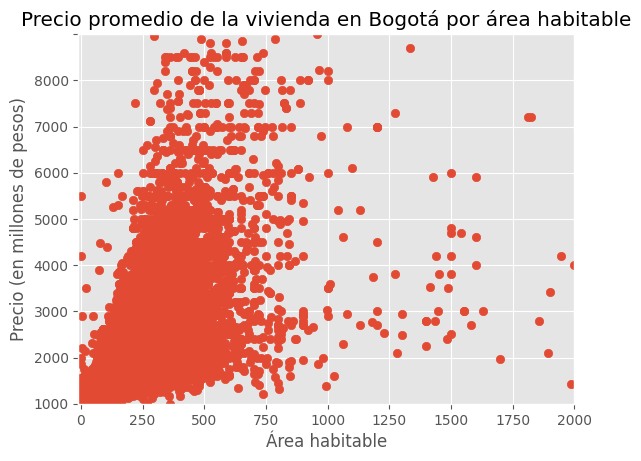

In [10]:
fig, ax = plt.subplots()
ax.scatter(df['area'], df['price'])
plt.xlim([-10, 2000])
plt.ylim([-100, 8000000000])
ax.set_yticklabels(range(0,9000,1000))
ax.set_title('Precio promedio de la vivienda en Bogotá por área habitable')
ax.set_xlabel('Área habitable')
ax.set_ylabel('Precio (en millones de pesos)')
plt.show

Vemos que la tendencia marca un gran incremento en el precio de la propiedad a medida que va aumentando el área de esta. Más allá de los valores atípicos que son normales en una muestra de este tamaño, la relación entre el área habitable de una vivienda y su precio parece ser lineal y de una pendiente muy elevada.

## Conclusiones

Los resultados de este proyecto pueden ser poco sorprendentes, sobretodo para las personas familiarizadas con la ciudad, pues son algo que la mayoría supone. Sin embargo, la verificación de estas suposiciones mediante datos y cifras es de gran importancia para quien esté pensando en adquirir o vender una vivienda. El precio de las propiedades es directamente proporcional tanto al área habitable como al estrato de esta (exceptuando el caso del estrato 1). Las localidades que presentan un mayor precio promedio son Chapinero, Usaquén y Barrios Unidos; miestras que las más económicas son Bosa, Ciudad Bolívar y Kennedy.

Este proyecto no está del todo terminado, pues aún podemos ir más allá. La idea más natural sería la implementación de un modelo de machine learning que mediante regresión pueda predecir el valor de una vivienda dadas las características de esta. Esperamos en un futuro cercano poder actualizar este notebook con este añadido.